### Prisma Data Analysis

Table of contents: 

  1. Importing librairies
  2. Defining functions
  3. Collecting data from file
  4. Plotting RGB
  5. Creating Pandas Geodataframe
  6. Importing Tare data


**1. Importing librairies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import box

**2. Defining functions**

In [2]:
def normalise(pic):
    '''
    Input:
    pic: array of values we want to normalise
    
    Output: 
    new: normalised array
    '''
    max = pic.max()
    min = pic.min()
    new = (pic - min)/(max-min)
    return new

def create_geopandas(data):
    '''
    Input:
    data: Pandas with corrected bands and lat and lon coord per row

    Output:
    Geodataframe, where each row represents a pixel. band values and geometry.
    '''
    df_all = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))
    df_all["label"] = np.zeros(1000000)
    return df_all

def label(size, nr_slices, df_all, seaweed_mask): 
    '''
    Input: 

    Output: 

    '''
    lon_min, lat_min, lon_max, lat_max = df_all.total_bounds
    dlon = (lon_max-lon_min)*nr_slices/size
    dlat = (lat_max-lat_min)*nr_slices/size
    number_of_slices = int(size/nr_slices)
    for i in range(number_of_slices-1):
        lat_lower = lat_min + i*dlat
        lat_upper = lat_min + (i+1)*dlat
        for j in range(number_of_slices-1):
            lon_left = lon_min + j*dlon
            lon_right = lon_min + (j+1)*dlon
            seaweed_current = gpd.clip(seaweed_mask, box(*(lon_left, lat_lower, lon_right, lat_upper)))
            if not seaweed_current.empty:
                polygons = unary_union(seaweed_current.geometry)
                df_all_current = gpd.clip(df_all, box(*(lon_left, lat_lower, lon_right, lat_upper)))
                df_all.loc[df_all_current.index, "label"] = df_all_current.geometry.within(polygons).astype(int)


**3. Collecting data from file**

In [4]:
filename = "Simon"
data = pd.read_pickle(filename)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'prisma_data.he5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

**4. Importing Tare data**

In [8]:
#Denne cellen tar 25 sek
data_naturdirektoratet = gpd.read_file("../data/naturdirektoratet.json")
seaweed = data_naturdirektoratet.copy()
seaweed= seaweed.loc[seaweed["naturtype"] == "størreTareskogforekomster"]

<AxesSubplot:>

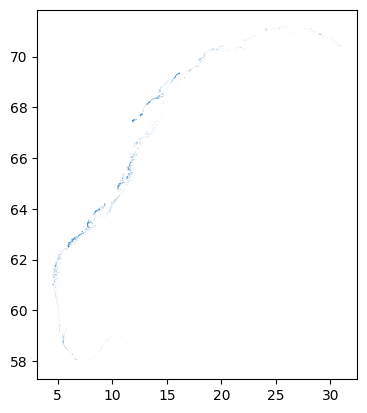

In [9]:
seaweed.plot()

**5. Creating Geopandas**

In [ ]:
df_all = create_geopandas(data)

**6. Preparing data from Naturdirektoratet** 

In [ ]:
#Denne cellen tar 30 sek
seaweed_mask= gpd.clip(seaweed, box(*df_all.total_bounds))
ax = df_all.plot()
seaweed_mask.plot(ax = ax, color = "red")

**7. Labelling the data**

In [ ]:
#This cell takes 50 sek to run 
label(1000,10, df_all, seaweed)

**8.Checking wether everything is correct**

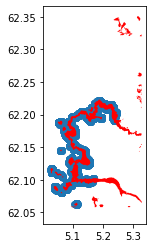

In [ ]:
df_all_true = df_all[df_all["label"] == True].copy()
ax = df_all_true.plot()
seaweed_mask.plot(ax = ax, color = "red")

**9.Creating csv files**

In [ ]:
df_all.to_csv("df_all.csv")

NameError: name 'df_all' is not defined